In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [251]:
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [252]:
df = pd.read_csv("train.csv")
df.head()
df.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [253]:
x = pd.read_csv('train.csv')
y = x.Attrition
x.drop(['Attrition'], axis=1, inplace=True)

# Get list of categorical variables
s = (x.dtypes == 'object')
object_cols = list(s[s].index)
object_cols = [col for col in x.columns if x[col].dtype == "object"]
x = pd.get_dummies(x, prefix_sep=" ",columns=object_cols)

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,test_size=0.2,random_state=0,stratify = y)

In [255]:
x_train.shape, x_test.shape

((1302, 49), (326, 49))

In [256]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_tr = constant_filter.transform(x_train)
x_te = constant_filter.transform(x_test)

In [257]:
x_tr.shape, x_te.shape

((1302, 48), (326, 48))

In [258]:
x_tr_t = x_tr.T
x_te_t = x_te.T

In [259]:
x_tr_t = pd.DataFrame(x_tr_t)
x_te_t = pd.DataFrame(x_te_t)

In [260]:
x_tr_t.duplicated().sum()

0

In [261]:
roc_auc = []
for feature in x_train.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train[feature].to_frame(),y_train)
    y_pred = clf.predict(x_test[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test,y_pred))

In [262]:
print(roc_auc)

[0.870764708099348, 0.5991030038065805, 0.5886443297026344, 0.45665774695662004, 0.9230769230769231, 0.5302076659254513, 0.5838766818678627, 0.5486375456978103, 0.8964497041420119, 0.5176195680850262, 0.563128933780575, 0.5, 0.6077149210417215, 0.5988768703124411, 0.572230806919685, 0.6605547808389551, 0.6186447065917913, 0.5554027060641464, 0.6287264915388385, 0.5085930727772962, 0.5, 0.49204763878943203, 0.5716089398108016, 0.5795613010213696, 0.4897486149323484, 0.5736252968002111, 0.5838766818678627, 0.4977198206007613, 0.5130592092865488, 0.5286435759243207, 0.5, 0.5, 0.531376022311838, 0.5, 0.5, 0.5437002977424339, 0.4897486149323484, 0.5215769042324653, 0.5, 0.5097991180793728, 0.5, 0.5, 0.5149624995288885, 0.5805223683714619, 0.5368974484604079, 0.5786002336712773, 0.6154976821316851, 0.675799947235518, 0.675799947235518]


In [263]:
roc_values = pd.Series(roc_auc)
roc_values.index = x_train.columns
roc_values.sort_values(ascending = False, inplace = True)
roc_values

EmployeeNumber                       0.923077
MonthlyIncome                        0.896450
Id                                   0.870765
OverTime No                          0.675800
OverTime Yes                         0.675800
YearsAtCompany                       0.660555
YearsWithCurrManager                 0.628726
YearsInCurrentRole                   0.618645
MaritalStatus Single                 0.615498
StockOptionLevel                     0.607715
Age                                  0.599103
TotalWorkingYears                    0.598877
DistanceFromHome                     0.588644
Department Sales                     0.583877
JobInvolvement                       0.583877
JobRole Sales Representative         0.580522
BusinessTravel Travel_Rarely         0.579561
MaritalStatus Married                0.578600
Department Research & Development    0.573625
TrainingTimesLastYear                0.572231
BusinessTravel Travel_Frequently     0.571609
PercentSalaryHike                 

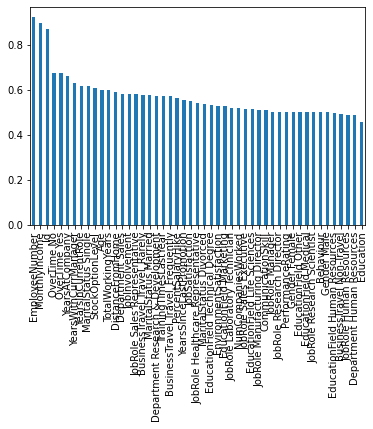

In [264]:
roc_values.plot.bar()

In [265]:
sel = roc_values[roc_values>0.498]


In [315]:
#x_train_roc = x_train[sel.index]
#x_test_roc = x_test[sel.index]
x_train_roc = x_train.drop(['BusinessTravel Travel_Rarely','Department Sales','EducationField Technical Degree', 'Gender Male','JobRole Sales Representative','MaritalStatus Single','OverTime Yes'],axis=1)
x_test_roc = x_test.drop(['BusinessTravel Travel_Rarely','Department Sales','EducationField Technical Degree', 'Gender Male','JobRole Sales Representative','MaritalStatus Single','OverTime Yes'],axis=1)

In [316]:
x_train_roc.shape

(1302, 42)

In [323]:
def run(x_train,x_test, y_train,y_test):
    clf = RandomForestClassifier(n_estimators=110,max_depth=40,random_state=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy:', accuracy_score(y_test,y_pred))
    print('Roc_AUC:', roc_auc_score(y_test,y_pred))

In [324]:
%%time
run(x_train_roc,x_test_roc,y_train,y_test)

Accuracy: 0.9386503067484663
Roc_AUC: 0.9369841329664946
Wall time: 600 ms


In [320]:
%%time
run(x_train,x_test,y_train,y_test)

Accuracy: 0.9478527607361963
Roc_AUC: 0.9463121395997437
Wall time: 2.71 s


In [321]:
xx = pd.read_csv("test.csv")



        
# Get list of categorical variables
s = (xx.dtypes == 'object')
object_cols = list(s[s].index)
object_cols = [col for col in xx.columns if xx[col].dtype == "object"]
xx = pd.get_dummies(xx, prefix_sep=" ",columns=object_cols)
        


In [322]:
sample_submission = pd.read_csv('Sample_submission.csv')
sample_submission.head()



,Id,Attrition
0,1,0.742476
1,2,0.347438
2,3,0.938753
3,4,0.456471
4,5,0.363193


In [313]:
clf = RandomForestClassifier(n_estimators=500,max_depth=40,random_state=1)
clf.fit(x_train_roc, y_train)
xx = xx.drop(['OverTime No','Gender Male','Behaviour','Department Human Resources','JobRole Human Resources','BusinessTravel Non-Travel','EducationField Human Resources','MaritalStatus Single'],axis=1)
a = clf.predict_proba(xx)

In [314]:
b=a[:,1]
ss=sample_submission.drop('Attrition',axis=1)
ss['Attrition']=b
ss.to_csv('submissionnew.csv',index=False)
ss.tail()

,Id,Attrition
465,466,0.384
466,467,0.724
467,468,0.254
468,469,0.118
469,470,0.088
